# EDA Ouline

#### Kaggle Dataset:- https://www.kaggle.com/code/sanjanchaudhari/beach-weather-stations-analysis?select=Beach_Weather_Stations_-_Automated_Sensors.csv

1. Import libraries
2. Helper functions
3. Load data and EDA
4. Data preprocessing

### 1. Import libraries

In [2]:
# data handling and visulaizing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Helper functions

In [3]:
# Method to return unique values for categorical columns with their count
def count_categorical_values(data):
    agg_val = []
    for col in data.columns:
        if data[col].dtype == "O":
            agg_val.append(data[col].value_counts())
        
    return agg_val

In [4]:
def count_cat_num(data):
    num_col = [col for col in data.columns if data[col].dtype != "O"]
    cat_col = [col for col in data.columns if data[col].dtype == "O"]
    
    print(f"Dataset has {len(num_col)} numerical features with values/value {num_col}")
    print(f"Dataset has {len(cat_col)} categorical features with values/value {cat_col}")

In [5]:
def plot_outliers(data):
    # Select numerical columns
    num_cols = [col for col in data.columns if data[col].dtype != 'O']
    
    # Define the number of rows and columns for the subplot grid
    num_plots = len(num_cols)
    cols_per_row = 4
    rows = (num_plots + cols_per_row - 1) // cols_per_row  # Calculate required rows
    
    # Create subplots
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, rows * 5))  # Adjust figsize for better display
    axes = axes.flatten()  # Flatten the 2D axes array to 1D for easier indexing
    
    # Plot each boxplot
    for idx, col in enumerate(num_cols):
        sns.boxplot(x=data[col], ax=axes[idx])
        axes[idx].set_title(f"Boxplot of {col}")
        axes[idx].set_xlabel("")
    
    # Hide any unused subplots
    for idx in range(num_plots, len(axes)):
        axes[idx].axis("off")
    
    plt.tight_layout()
    plt.show()

In [6]:
def plot_histograms(data):
    # Select numerical columns
    num_cols = [col for col in data.columns if data[col].dtype != 'O']
    
    # Define the number of rows and columns for the subplot grid
    num_plots = len(num_cols)
    cols_per_row = 4
    rows = (num_plots + cols_per_row - 1) // cols_per_row  # Calculate required rows
    
    # Create subplots
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, rows * 5))  # Adjust figsize for better display
    axes = axes.flatten()  # Flatten the 2D axes array to 1D for easier indexing
    
    # Plot each histogram
    for idx, col in enumerate(num_cols):
        sns.histplot(data[col], ax=axes[idx], bins=30, kde=True, color='blue')  # Histogram with KDE overlay
        axes[idx].set_title(f"Histogram of {col}")
        axes[idx].set_xlabel("")
    
    # Hide any unused subplots
    for idx in range(num_plots, len(axes)):
        axes[idx].axis("off")
    
    plt.tight_layout()
    plt.show()


In [9]:
def plot_categorical(data):
    # Select categorical columns
    cat_cols = [col for col in data.columns if data[col].dtype == 'O']
    
    # Create subplots
    num_plots = len(cat_cols)
    cols_per_row = 4
    rows = (num_plots + cols_per_row - 1) // cols_per_row
    
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, rows * 5))
    axes = axes.flatten()
    
    for idx, col in enumerate(cat_cols):
        sns.countplot(x=data[col], ax=axes[idx], palette='viridis')  # Bar plot for categorical data
        axes[idx].set_title(f"Countplot of {col}")
    
    for idx in range(num_plots, len(axes)):
        axes[idx].axis("off")
    
    plt.tight_layout()
    plt.show()

In [10]:
def remove_outliers(data):
    for col in [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col])]:
        Q1 = data[col].quantile(0.25)  # 1st quartile
        Q3 = data[col].quantile(0.75)  # 3rd quartile
        IQR = Q3 - Q1  # Interquartile range

        # Proceed only if IQR > 0 to avoid unnecessary computations
        if IQR > 0:
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Compute the mean of non-outlier values only once
            mean_value = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)][col].mean()
            
            # Replace outliers with the mean value
            data[col] = data[col].apply(
                lambda x: mean_value if x < lower_bound or x > upper_bound else x
            )
    
    return data

### 3. Load Data and EDA

In [11]:
data = pd.read_csv("D:\job\Data_Pipeline\data\Beach_Weather_Stations_-_Automated_Sensors.csv\Beach_Weather_Stations_-_Automated_Sensors.csv")

# display random 10 rows
data.sample(10)

,Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Timestamp Label,Measurement ID
113428,Foster Weather Station,02/28/2018 09:00:00 PM,2.00,NaN,87,NaN,0.0,NaN,NaN,350,5.1,5.3,988.1,0,NaN,14.8,02/28/2018 9:00 PM,FosterWeatherStation201802282100
66845,63rd Street Weather Station,10-02-2021 19:00,21.70,21.7,100,0.0,0.0,535.8,0.0,226,2.5,4.0,991.3,0,351.0,11.8,10-02-2021 19:00,63rdStreetWeatherStation202110021900
77284,63rd Street Weather Station,07-01-2019 17:00,25.10,22.5,80,0.0,0.0,185.4,0.0,0,0.0,0.5,992.4,496,354.0,11.9,07-01-2019 17:00,63rdStreetWeatherStation201907011700
102841,63rd Street Weather Station,04-03-2022 18:00,3.40,2.9,93,0.0,0.0,19.9,0.0,86,4.0,4.9,995.1,67,350.0,11.9,04-03-2022 18:00,63rdStreetWeatherStation202204031800
17501,Foster Weather Station,10-12-2016 03:00,18.50,NaN,53,NaN,0.0,NaN,NaN,198,2.1,2.4,993.6,0,NaN,15.1,10-12-2016 03:00,FosterWeatherStation201610120300
137633,Oak Street Weather Station,11/20/2017 12:00:00 AM,1.90,-0.8,58,0.0,0.0,3.6,0.0,265,3.2,8.4,995.5,1,2.0,12.0,11/20/2017 12:00 AM,OakStreetWeatherStation201711202400
145731,Oak Street Weather Station,10/26/2022 09:00:00 AM,7.60,5.5,74,0.0,0.0,4.4,0.0,336,2.2,3.6,991.7,258,357.0,11.9,10/26/2022 9:00 AM,OakStreetWeatherStation202210260900
155978,Foster Weather Station,05/24/2023 01:00:00 PM,10.28,NaN,80,NaN,0.0,NaN,NaN,0,3.3,0.0,1001.0,873,NaN,15.2,05/24/2023 1:00 PM,FosterWeatherStation202305241300
36742,63rd Street Weather Station,03-05-2016 22:00,2.60,1.2,79,0.0,0.0,16.7,0.0,14,2.3,3.9,1002.1,4,353.0,11.9,03-05-2016 22:00,63rdStreetWeatherStation201603052200
99334,63rd Street Weather Station,03-06-2022 00:00,13.40,11.5,80,64.8,12.1,32.8,60.0,271,11.5,18.6,984.6,1,350.0,11.8,03-06-2022 00:00,63rdStreetWeatherStation202203062400


In [12]:
data.shape

(156051, 18)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156051 entries, 0 to 156050
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Station Name                 156051 non-null  object 
 1   Measurement Timestamp        156051 non-null  object 
 2   Air Temperature              155976 non-null  float64
 3   Wet Bulb Temperature         100746 non-null  float64
 4   Humidity                     156051 non-null  int64  
 5   Rain Intensity               100746 non-null  float64
 6   Interval Rain                156051 non-null  float64
 7   Total Rain                   100746 non-null  float64
 8   Precipitation Type           100746 non-null  float64
 9   Wind Direction               156051 non-null  int64  
 10  Wind Speed                   156051 non-null  float64
 11  Maximum Wind Speed           156051 non-null  float64
 12  Barometric Pressure          155905 non-null  float64
 13 

In [14]:
data.describe()

,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life
count,155976.000000,100746.000000,156051.000000,100746.000000,156051.000000,100746.000000,100746.000000,156051.000000,156051.000000,156051.000000,155905.000000,156051.000000,100746.000000,156051.000000
mean,12.468682,10.254500,68.583335,0.171445,0.150576,153.745441,4.347915,156.613479,2.962541,3.987760,994.340606,113.238095,267.234272,13.059496
std,10.515914,9.458017,15.794602,1.926277,1.154793,203.440309,15.727968,118.112641,5.401013,5.985419,8.730070,417.299021,151.679276,1.513820
min,-29.780000,-28.900000,6.000000,0.000000,-0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,962.800000,-100000.000000,0.000000,11.200000
25%,4.100000,2.900000,58.000000,0.000000,0.000000,15.900000,0.000000,36.000000,1.500000,1.800000,990.200000,0.000000,320.000000,11.900000
50%,13.500000,11.600000,70.000000,0.000000,0.000000,55.800000,0.000000,147.000000,2.700000,3.500000,994.300000,3.000000,354.000000,12.000000
75%,21.500000,18.400000,81.000000,0.000000,0.000000,221.600000,0.000000,265.000000,3.700000,5.600000,998.600000,116.000000,356.000000,15.100000
max,37.000000,28.400000,100.000000,183.600000,63.420000,1056.100000,70.000000,359.000000,999.900000,999.900000,3098.500000,1277.000000,359.000000,15.300000


In [16]:
data["Station Name"].unique()

array(['63rd Street Weather Station', 'Foster Weather Station',
       'Oak Street Weather Station'], dtype=object)

In [17]:
count_cat_num(data)

Dataset has 14 numerical features with values/value ['Air Temperature', 'Wet Bulb Temperature', 'Humidity', 'Rain Intensity', 'Interval Rain', 'Total Rain', 'Precipitation Type', 'Wind Direction', 'Wind Speed', 'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation', 'Heading', 'Battery Life']
Dataset has 4 categorical features with values/value ['Station Name', 'Measurement Timestamp', 'Measurement Timestamp Label', 'Measurement ID']


#### Check for missing values

In [18]:
data.isna().sum().sort_values()

Station Name                       0
Battery Life                       0
Solar Radiation                    0
Maximum Wind Speed                 0
Wind Speed                         0
Wind Direction                     0
Measurement Timestamp Label        0
Measurement ID                     0
Interval Rain                      0
Humidity                           0
Measurement Timestamp              0
Air Temperature                   75
Barometric Pressure              146
Rain Intensity                 55305
Wet Bulb Temperature           55305
Heading                        55305
Total Rain                     55305
Precipitation Type             55305
dtype: int64

#### Duplicate values

In [19]:
data.duplicated().sum()

0

#### Check the distribution of the data

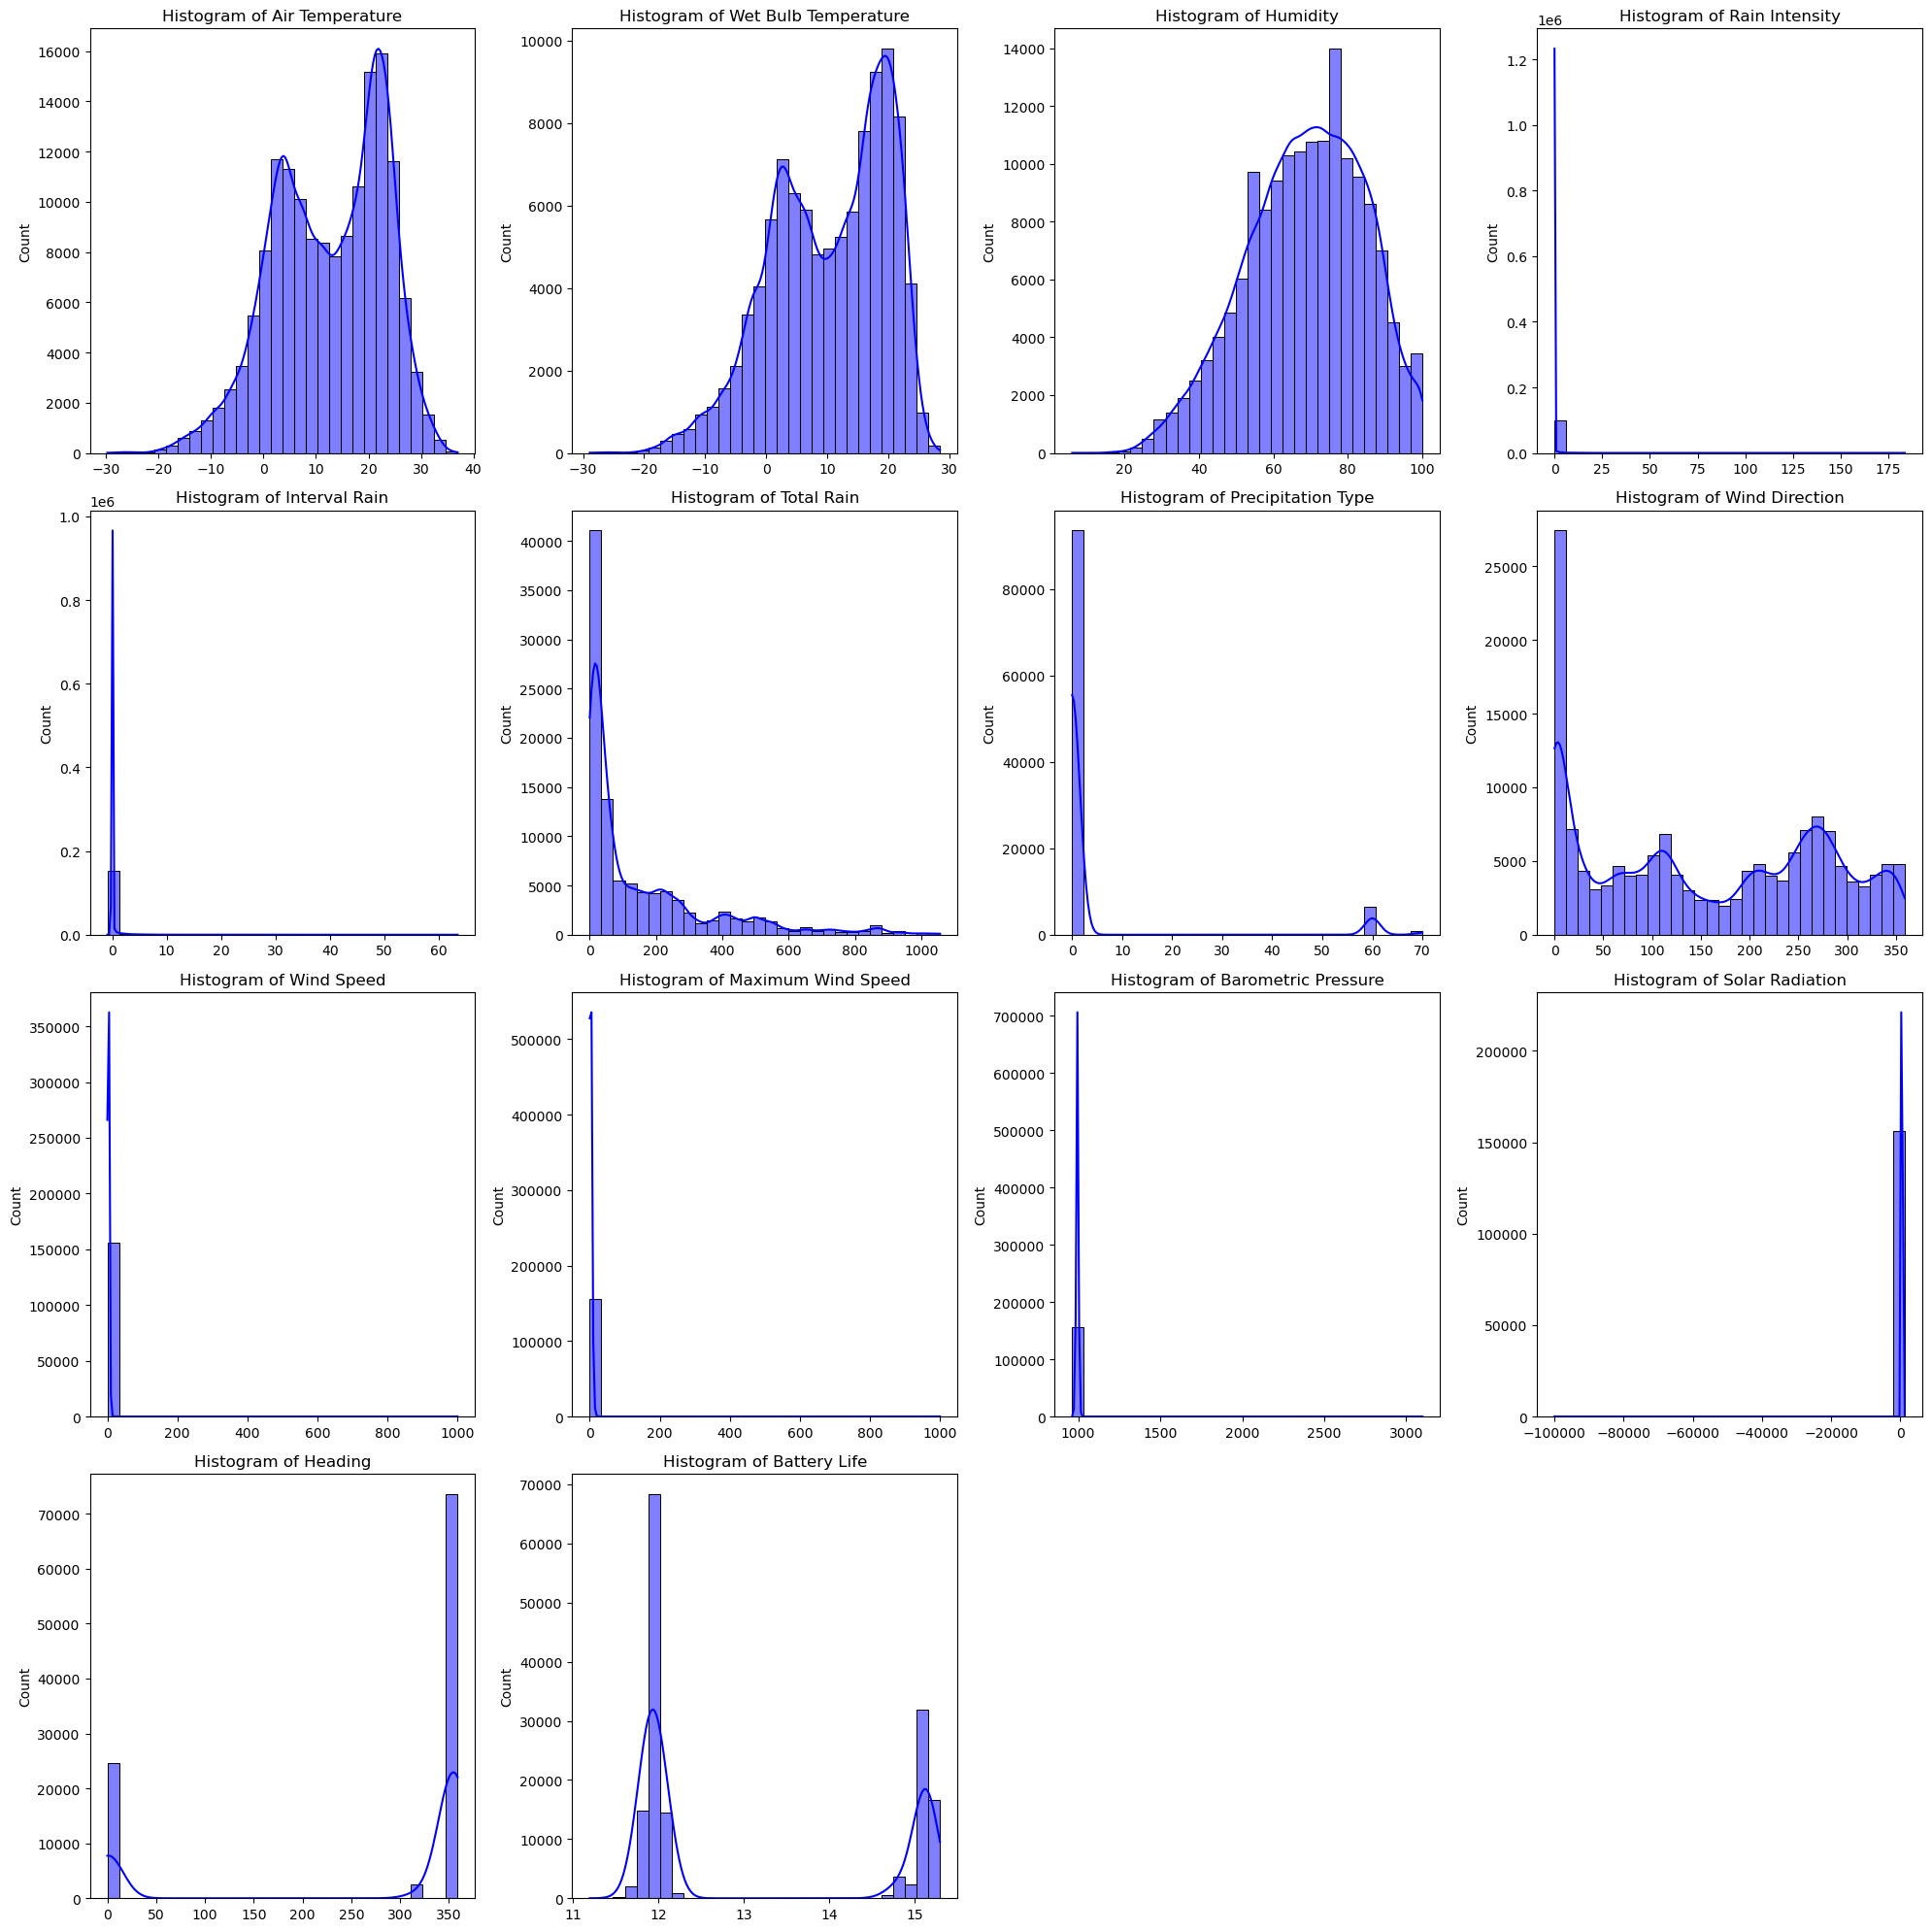

In [20]:
# let's first check the distribution of the data
plot_histograms(data)

KeyboardInterrupt: 

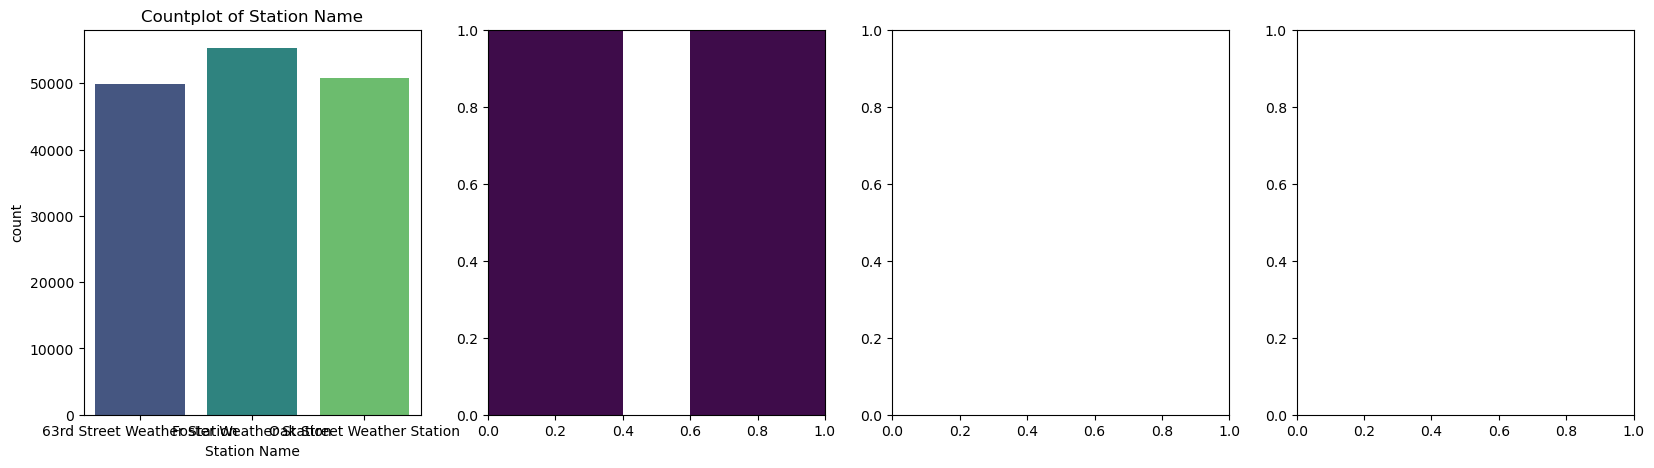

In [21]:
plot_categorical(data)

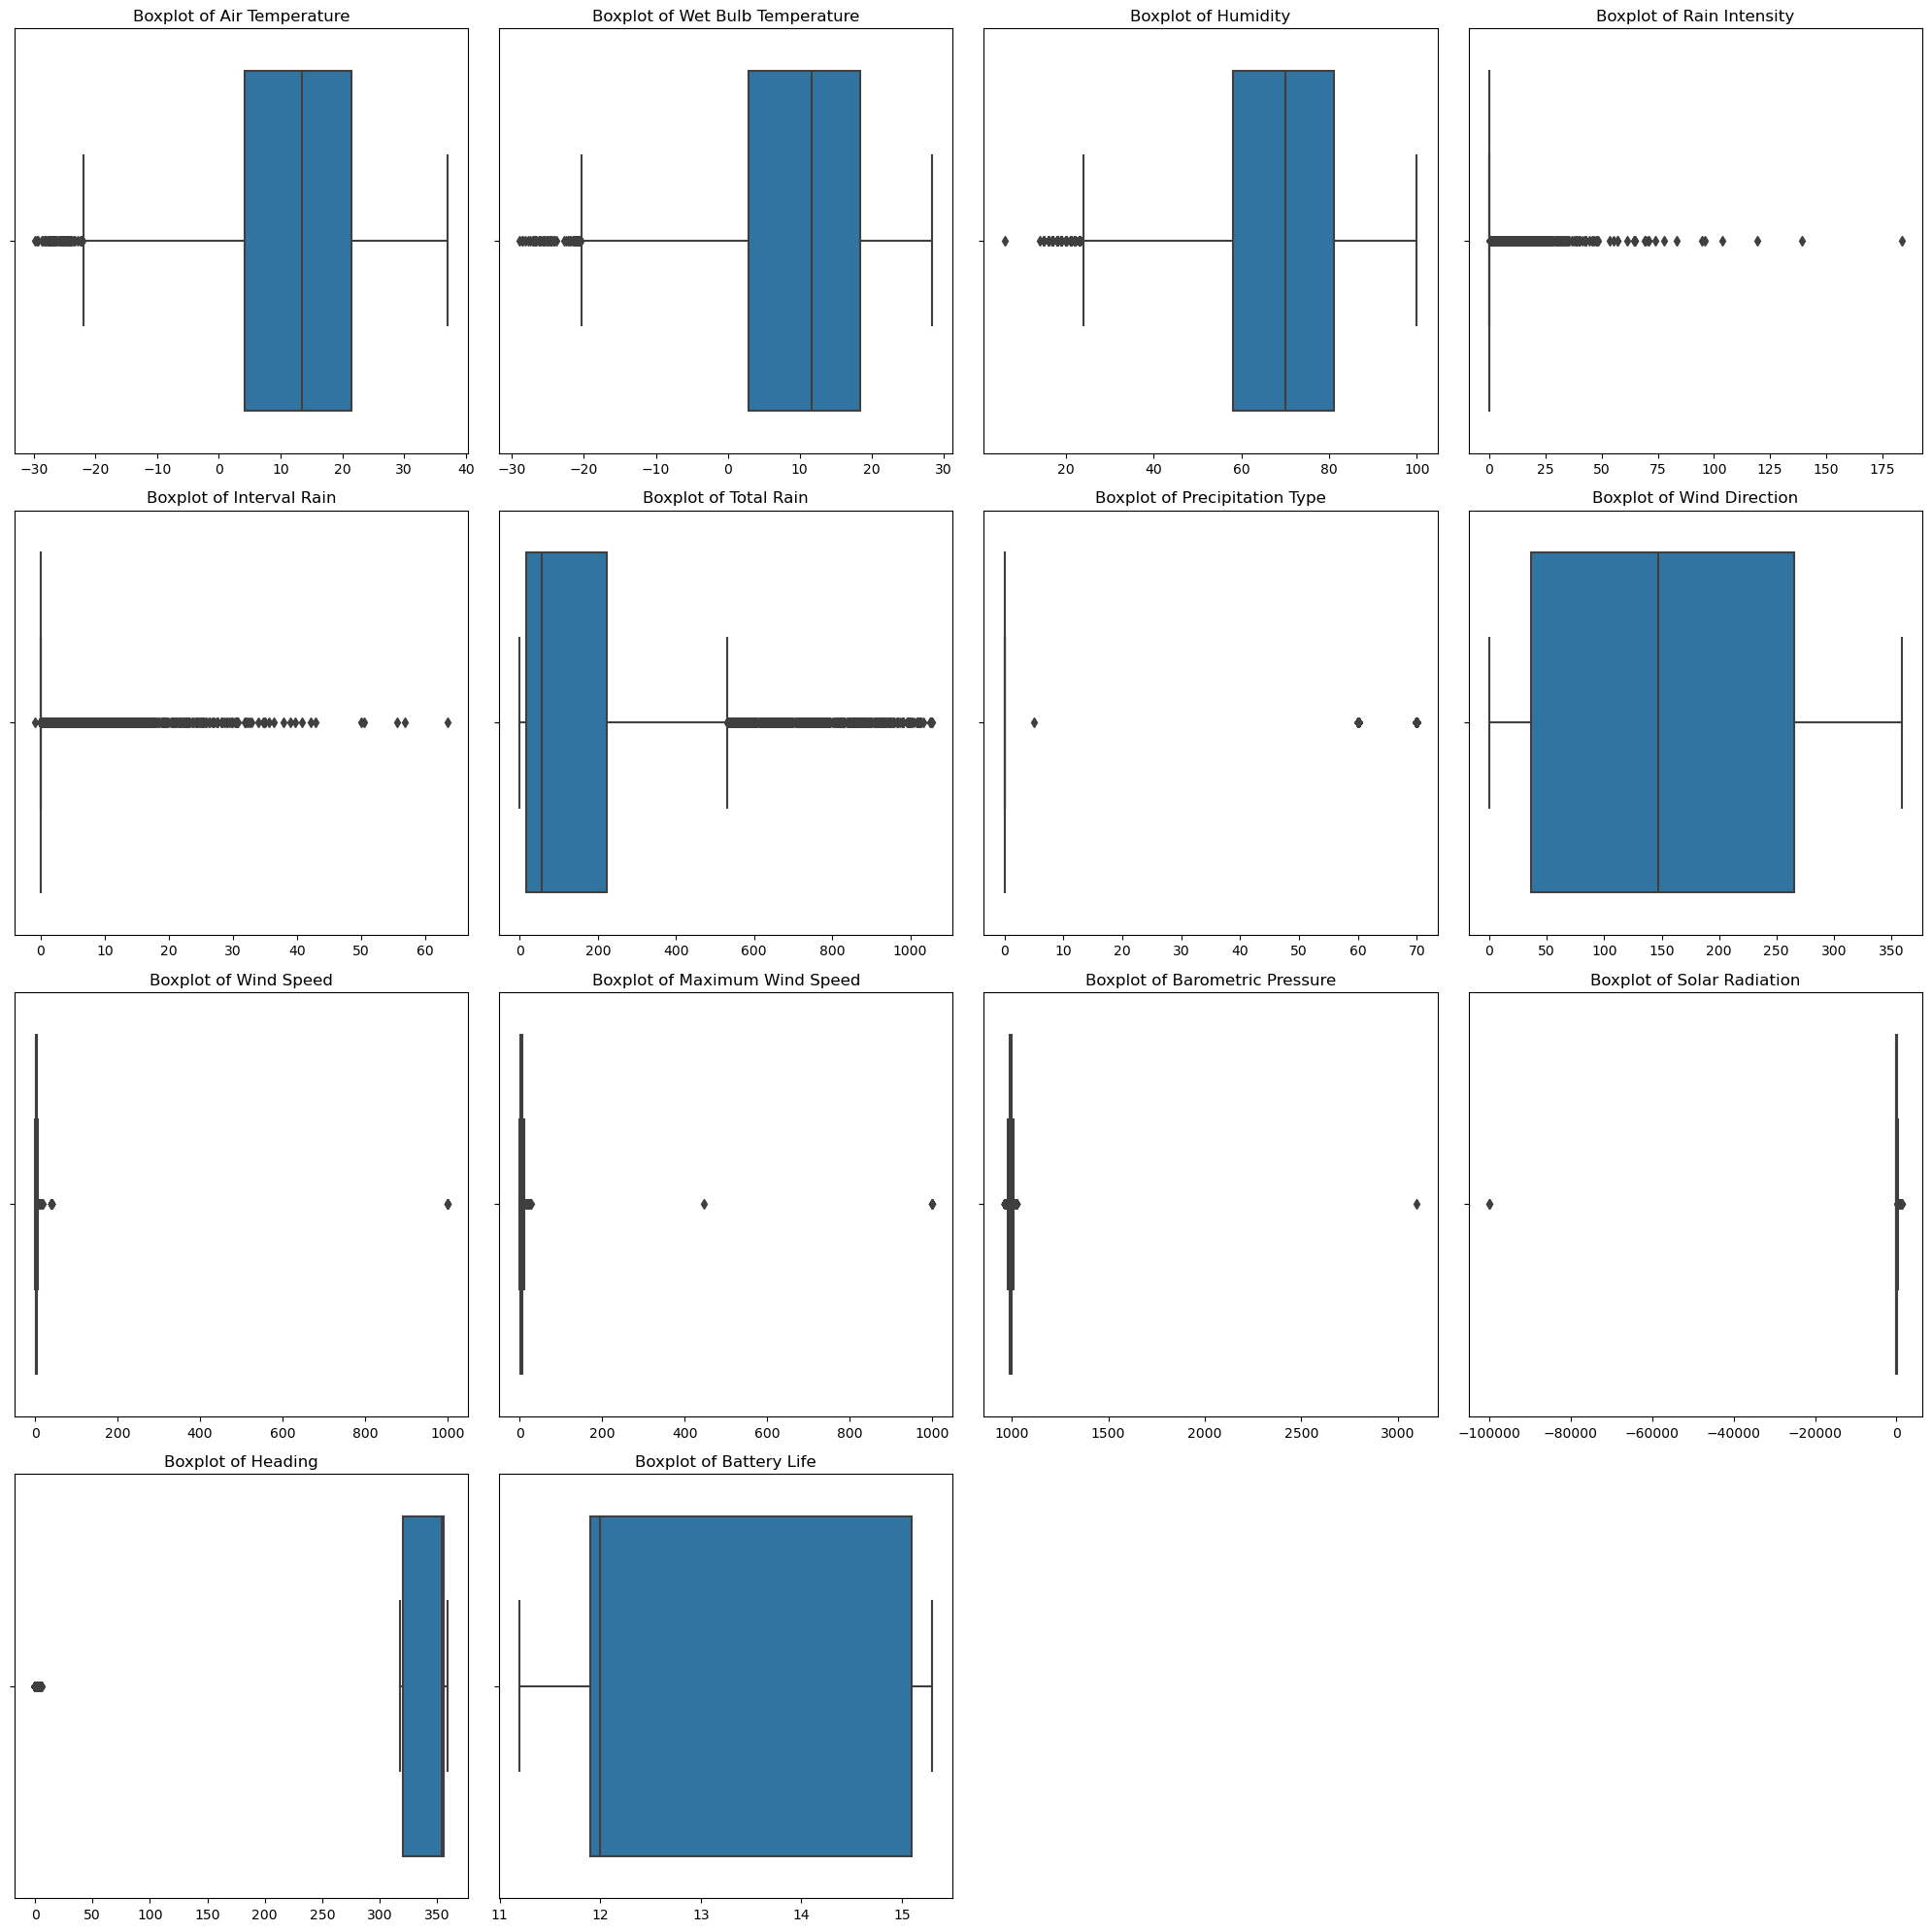

In [22]:
plot_outliers(data)

C:\Users\swapn\AppData\Local\Temp\ipykernel_28172\1231671931.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


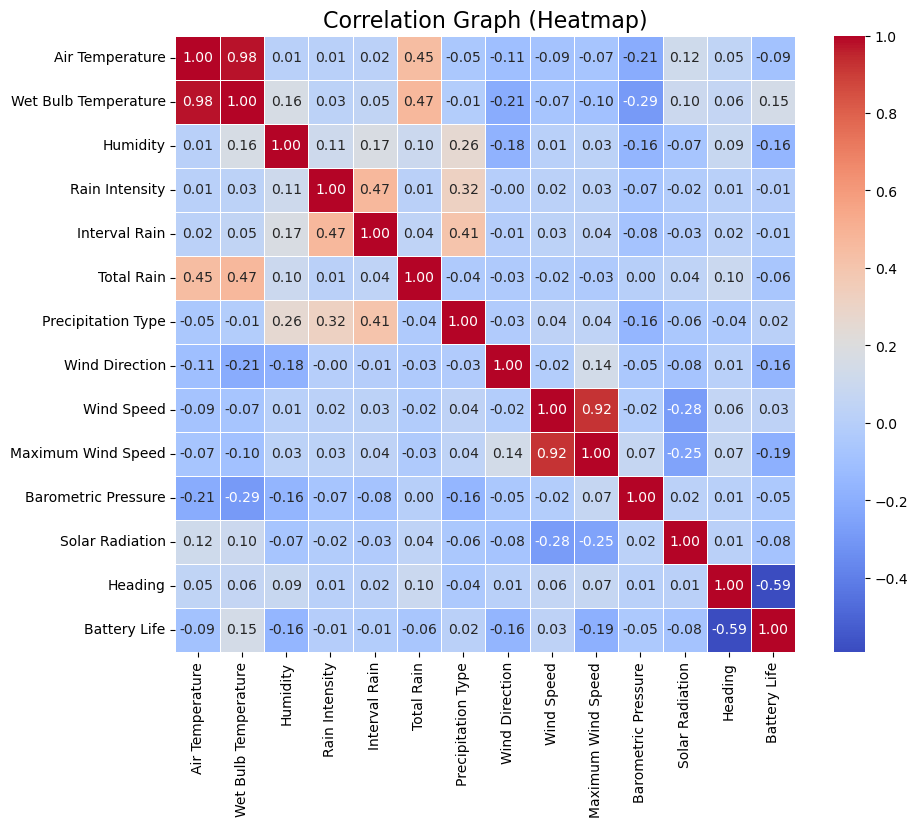

In [23]:
# Now let's check for the correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Graph (Heatmap)', fontsize=16)
plt.show()